# Import  Libraries

In [ ]:
import numpy as np
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import Word , TextBlob
import re
import string
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

# Get Tweets

In [ ]:
# your Twitter API key and API secret
my_api_key = " "
my_api_secret = "  "
Bearer_Token= "   "
Access_token="   "
Access_Token_Secret="   "
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(Access_token,Access_Token_Secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_query = "#TheBatman-filter:retweets"
query = tw.Cursor(api.search,
              q=search_query,
              lang="en"
              ).items(5000)
# store the API responses in a list
#tweets_copy = []
#for tweet in query:
    #tweets_copy.append(tweet)
    
#print("Total Tweets fetched:", len(tweets_copy))
tweets=[{'Tweets':tweet.text,'timestamp':tweet.created_at}for tweet in query]
print(tweets)

In [ ]:
df= pd.DataFrame.from_dict(tweets)
df.head(10)


,Tweets,timestamp
0,"Just watched #TheBatman good film, didn't have...",2022-03-14 15:57:18
1,Bought the The Batman Oreo’s thinking I can wi...,2022-03-14 15:57:11
2,The Riddler watching District Attorney Colson'...,2022-03-14 15:56:40
3,Ben Affleck’s cancelled Batman movie concept a...,2022-03-14 15:56:39
4,Say one bad thing about Elon Musk and your not...,2022-03-14 15:56:37
5,Me and two teenage boys in a massive cinema to...,2022-03-14 15:56:29
6,"Oh, and I'm seeing #TheBatman today.",2022-03-14 15:56:17
7,"Jus watched #TheBatman it was just epic , espe...",2022-03-14 15:56:00
8,The Riddler watching District Attorney Colson'...,2022-03-14 15:55:47
9,You enjoying a film more than #TheBatman does ...,2022-03-14 15:55:38


In [ ]:
df.to_csv('thebatman_tweets.csv',index=True)

# Read the data

In [ ]:
from google.colab import files
uplaolded= files.upload()

Saving thebatman_tweets.csv to thebatman_tweets.csv


In [ ]:
df=pd.read_csv('thebatman_tweets.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Tweets,timestamp
0,"Just watched #TheBatman good film, didn't have...",2022-03-14 15:57:18
1,Bought the The Batman Oreo’s thinking I can wi...,2022-03-14 15:57:11
2,The Riddler watching District Attorney Colson'...,2022-03-14 15:56:40
3,Ben Affleck’s cancelled Batman movie concept a...,2022-03-14 15:56:39
4,Say one bad thing about Elon Musk and your not...,2022-03-14 15:56:37


Count of words and characters

In [ ]:
def count_cart_word(tweet):
 count = 5000
 #caracters
 length_characters = tweet.str.len()
 #print(df['total_length_characters'])
 print('the max length characters is :',max(length_characters))
 print('the min length characters is :',min(length_characters))
 total_length_characters = length_characters.sum()
 average_length = total_length_characters / count
 print (average_length)
 #words
 count_words = tweet.str.split().str.len()
 #print(df['total_count_words'])
 total_words = count_words.sum()
 print('the max  count words is :',max(count_words))
 print('the min  count words is :',min(count_words))
 print(total_words)
 average_words = total_words / count
 print (average_words)


In [ ]:
count_cart_word(df['Tweets'])

the max length characters is : 152
the min length characters is : 17
106.7978
the max  count words is : 32
the min  count words is : 2
76968
15.3936


In [ ]:
df['length_characters'] = df['Tweets'].str.len()
df['count_words']=df['Tweets'].str.split().str.len()


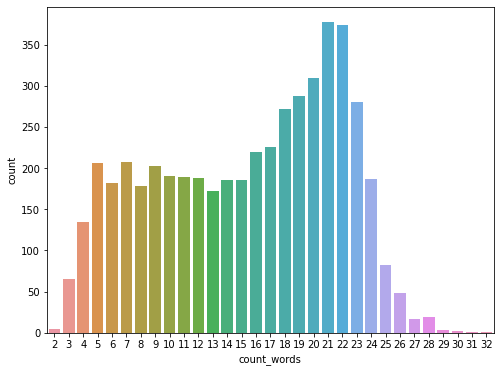

In [ ]:
plt.figure(figsize = (8,6))
#sns.countplot(data = df, x = 'length_characters')
sns.countplot(data = df, x = 'count_words')
plt.show()

Top hashtags

In [ ]:
def hashtag_extract(text_list):
  hashtags = []
# Loop over the words in the tweet
  for text in text_list:
    ht = re.findall(r"#(\w+)", text)
    hashtags.append(ht)
  return hashtags
def generate_hashtag_freqdist(hashtags):
  a = nltk.FreqDist(hashtags)
  d = pd.DataFrame({'Hashtag': list(a.keys()),
  'Count': list(a.values())})
# selecting top 15 most frequent hashtags
  d = d.nlargest(columns="Count", n = 25)
  plt.figure(figsize=(12,7))
  ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
  plt.xticks(rotation=80)
  ax.set(ylabel = 'Count')
  plt.show()


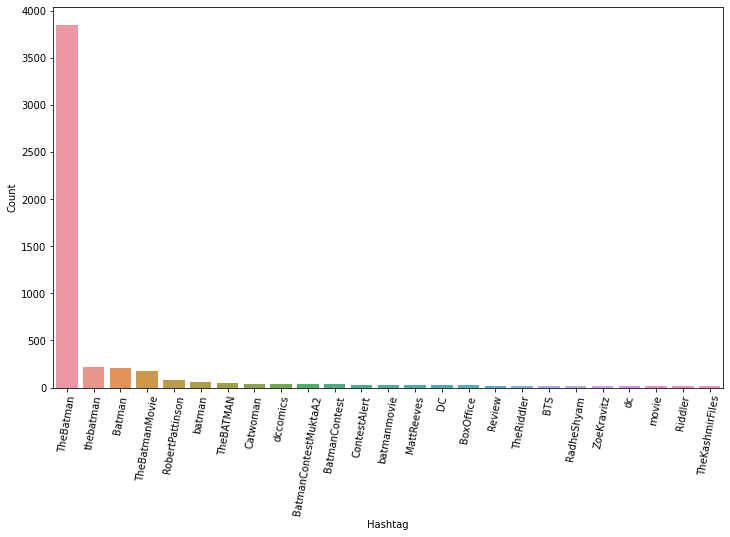

In [ ]:
hashtags = hashtag_extract(df["Tweets"])
hashtags = sum(hashtags, [])
generate_hashtag_freqdist(hashtags)

# Preprocessing

Duplicates

In [ ]:
df['Tweets'].drop_duplicates(inplace=True)

Stop_words

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords= ['thebatman','the batman','#boxoffice','#turningRed','#batcat']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming and lemmatization

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> omw-1.4


      Unzipping corpora/omw-1.4.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
stemmer = nltk.SnowballStemmer("english")
 
# Create WordNetLemmatizer object
lm= nltk.WordNetLemmatizer()


Cleaning tweets

In [ ]:
def clean(text):
 # convert to lowercase
 text = str(text).lower()
 # remove hashtags
 text= re.sub("(#[A-Za-z0-9]+)", '', text)
 #remove any character enter [ ] and []
 text = re.sub('\[.*\]', '', text)
 #remove hyperlinks
 text = re.sub('https?://\S+|www\.\S+', '', text)
 #remove any character enter < > and < >
 text = re.sub('<.*?>+', '', text)
 #remove punctuation
 #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 #remove \n newline
 text = re.sub('\n', '', text)
 #remove symbols and digital(a9a)
 text = re.sub('\w*\d\w*', '', text)
 #stop word
 text = [word for word in text.split(' ') if word not in stop_words]
 text=" ".join(text)
 #stemming
 #stemmer = nltk.SnowballStemmer("english")
 #text = [stemmer.stem(word) for word in text.split(' ')]
 #text=" ".join(text)
 #lemmatization
 text = [lm.lemmatize(word) for word in text.split(' ')]
 text=" ".join(text)
 return text
df["clean_Tweets"] = df["Tweets"].apply(clean)
df.head()

,Tweets,timestamp,length_characters,count_words,clean_Tweets
0,"Just watched #TheBatman good film, didn't have...",2022-03-14 15:57:18,140,25,"watched good film, long was. issue theme. soun…"
1,Bought the The Batman Oreo’s thinking I can wi...,2022-03-14 15:57:11,123,19,bought batman oreo’s thinking win meet greet r...
2,The Riddler watching District Attorney Colson'...,2022-03-14 15:56:40,139,17,riddler watching district attorney colson's su...
3,Ben Affleck’s cancelled Batman movie concept a...,2022-03-14 15:56:39,140,22,ben affleck’s cancelled batman movie concept a...
4,Say one bad thing about Elon Musk and your not...,2022-03-14 15:56:37,116,21,say one bad thing elon musk notification full ...


In [ ]:
count_cart_word(df['clean_Tweets'])

the max length characters is : 116
the min length characters is : 1
53.1106
the max  count words is : 27
the min  count words is : 0
39643
7.9286


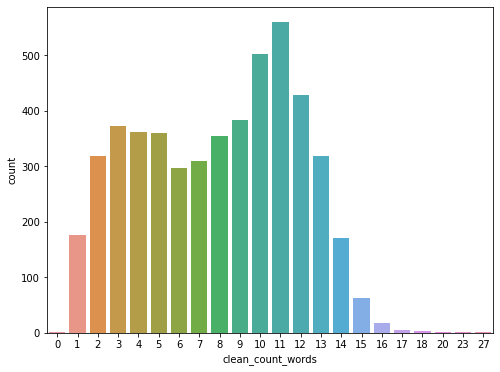

In [ ]:
df['clean_count_words']=df['clean_Tweets'].str.split().str.len()
plt.figure(figsize = (8,6))
#sns.countplot(data = df, x = 'length_characters')
sns.countplot(data = df, x = 'clean_count_words')
plt.show()

# Sentiment anlysis

In [ ]:
from textblob import TextBlob
def analyze_sentiment(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'
df['Sentiment'] = df['clean_Tweets'].apply(lambda x:analyze_sentiment(x))

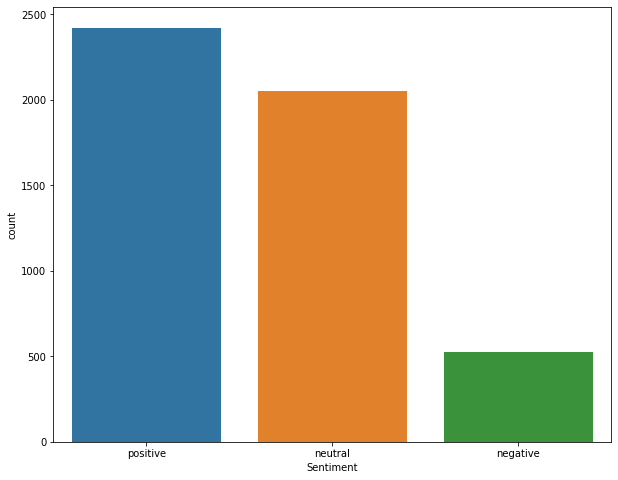

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

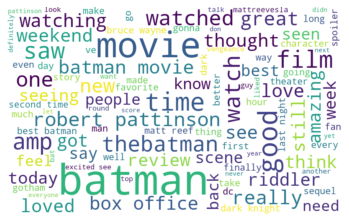

In [ ]:
from wordcloud import WordCloud
txt = ' '.join(text for text in df['clean_Tweets'])
wordcloud = WordCloud(

background_color = 'white',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

#Vader

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['scores'] = df['clean_Tweets'].apply(lambda x: sid.polarity_scores(x))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Tweets,timestamp,length_characters,count_words,clean_Tweets,clean_count_words,Sentiment,scores,compound
0,"Just watched #TheBatman good film, didn't have...",2022-03-14 15:57:18,140,25,"watched good film, long was. issue theme. soun…",8,positive,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404
1,Bought the The Batman Oreo’s thinking I can wi...,2022-03-14 15:57:11,123,19,bought batman oreo’s thinking win meet greet r...,10,positive,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.7269
2,The Riddler watching District Attorney Colson'...,2022-03-14 15:56:40,139,17,riddler watching district attorney colson's su...,12,neutral,"{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...",-0.6369
3,Ben Affleck’s cancelled Batman movie concept a...,2022-03-14 15:56:39,140,22,ben affleck’s cancelled batman movie concept a...,16,neutral,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",-0.2500
4,Say one bad thing about Elon Musk and your not...,2022-03-14 15:56:37,116,21,say one bad thing elon musk notification full ...,12,negative,"{'neg': 0.219, 'neu': 0.625, 'pos': 0.156, 'co...",-0.2500


In [ ]:
def cops(score):

  if (score>=0.05):
    return'positive'
  elif (-0.05>score<0.05):
     return 'neutral'
  else:
    return 'negative'

df['comp scores'] = df['compound'].apply(cops)

In [ ]:
df.head()

,Tweets,timestamp,length_characters,count_words,clean_Tweets,clean_count_words,Sentiment,scores,compound,comp scores
0,"Just watched #TheBatman good film, didn't have...",2022-03-14 15:57:18,140,25,"watched good film, long was. issue theme. soun…",8,positive,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404,positive
1,Bought the The Batman Oreo’s thinking I can wi...,2022-03-14 15:57:11,123,19,bought batman oreo’s thinking win meet greet r...,10,positive,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.7269,positive
2,The Riddler watching District Attorney Colson'...,2022-03-14 15:56:40,139,17,riddler watching district attorney colson's su...,12,neutral,"{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...",-0.6369,neutral
3,Ben Affleck’s cancelled Batman movie concept a...,2022-03-14 15:56:39,140,22,ben affleck’s cancelled batman movie concept a...,16,neutral,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",-0.2500,neutral
4,Say one bad thing about Elon Musk and your not...,2022-03-14 15:56:37,116,21,say one bad thing elon musk notification full ...,12,negative,"{'neg': 0.219, 'neu': 0.625, 'pos': 0.156, 'co...",-0.2500,neutral


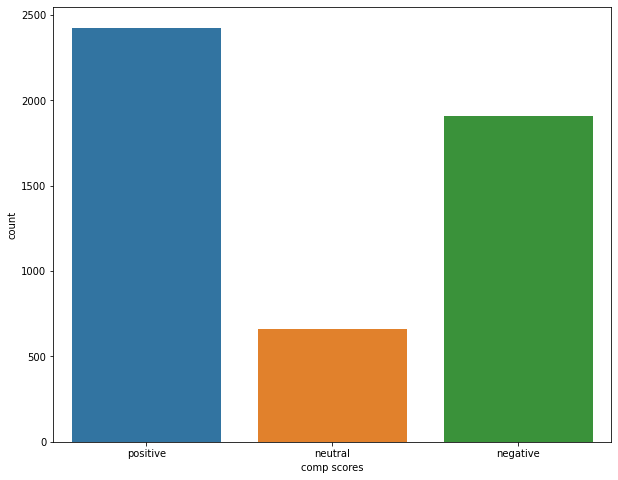

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'comp scores')
plt.show()